# Tarea 4 - Miguel Rios Tangarife - Punto 1

In [1]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sounddevice as sd

In [2]:
# Leer el archivo CSV
data = pd.read_csv('data/train/trainingpunto1.csv')
x = data["x"].values
y = data["TARGET"].values

In [3]:
# Función para predecir valores y en función de los parámetros a, b, c y d
def y_predict(a,b,c,d,x):
    return a * math.cos(b*x + c) + d

In [16]:
# Parámetros del algoritmo de gradiente descendente
lr = 0.005
n = len(x)
batch = 1024
epochs = 3000
rsl = []
#Parametros aleatorios inicialmente
a = random.random()
b = random.random()
c = random.random()
d = 0

In [17]:
for i in range(epochs):
    a_gradiente = 0
    b_gradiente = 0
    c_gradiente = 0
    d_gradiente = 0
    e = 0
    
for m in range(batch):
        ix = int(random.uniform(0,n))
        e +=  (y[ix] - y_predict(a,b,c,d,x[ix]))* (y[ix] - y_predict(a,b,c,d,x[ix]))
        a_gradiente += -2 * (y[ix] - y_predict(a, b, c, d, x[ix])) * math.cos(b * x[ix] + c)
        b_gradiente += -2 * (y[ix] - y_predict(a, b, c, d, x[ix])) * a * x[ix] * math.sin(b * x[ix] + c)
        c_gradiente += -2 * (y[ix] - y_predict(a, b, c, d, x[ix])) * a * math.sin(b * x[ix] + c)

        a = a - lr * a_gradiente/batch
        b = b - lr * b_gradiente/batch
        c = c - lr * c_gradiente/batch
    
        e = e/batch
        rsl.append([a,b,c,d,e])
        print(f"error:{e} period:{b} amplitude:{a} constant: {c} ")

error:8.361986824308431e-05 period:0.5137667663655313 amplitude:0.8704820822005299 constant: 0.8342793953933162 
error:0.00016228587001634474 period:0.5137909839369752 amplitude:0.8704797652828126 constant: 0.8342813262316721 
error:8.112327898902383e-05 period:0.5138098628652621 amplitude:0.8704746923674173 constant: 0.8342827714739804 
error:0.0005633812354833889 period:0.5138713924930928 amplitude:0.8704645817805948 constant: 0.8342889551561987 
error:0.00028847629997921364 period:0.5139420926124116 amplitude:0.8704492696765883 constant: 0.8342960358834989 
error:0.00028525170164925035 period:0.5140179088798854 amplitude:0.8704347812213266 constant: 0.8343076522030506 
error:0.0004851553175501174 period:0.5141065901352557 amplitude:0.8704162887517655 constant: 0.8343241397788456 
error:0.0004919124579949563 period:0.5142265145897759 amplitude:0.8703919967602414 constant: 0.8343439254862313 
error:4.3980684030722034e-05 period:0.5143628495491872 amplitude:0.8703690739124263 constant:

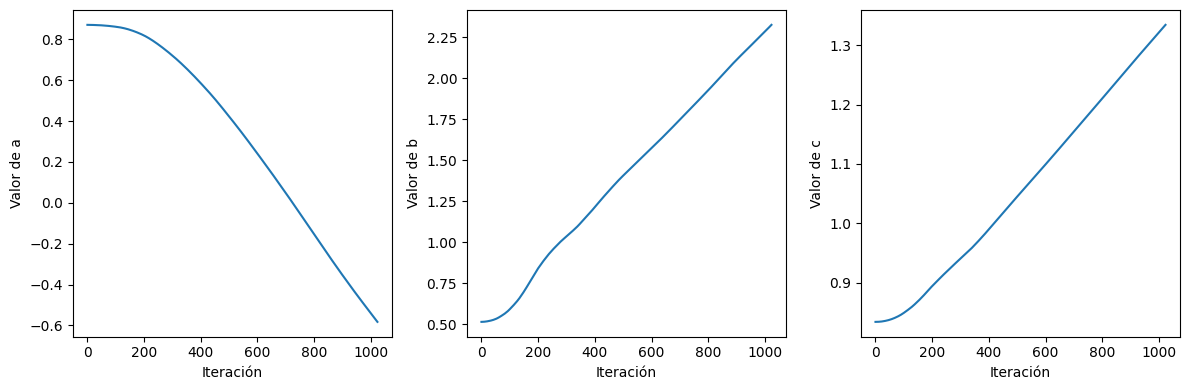

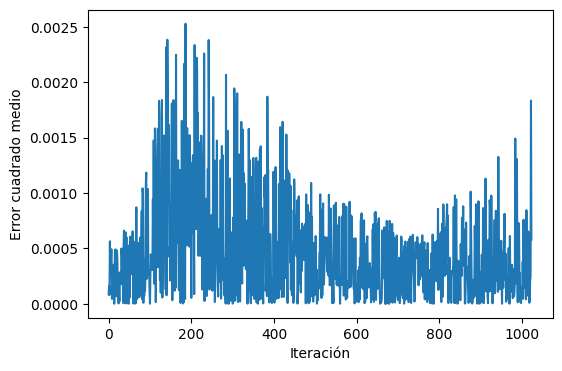

In [18]:
a_values = [record[0] for record in rsl]
b_values = [record[1] for record in rsl]
c_values = [record[2] for record in rsl]
error_values = [record[4] for record in rsl]

# Grafica los valores de los parámetros y el error a lo largo de las iteraciones
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(a_values)
plt.xlabel('Iteración')
plt.ylabel('Valor de a')
plt.subplot(132)
plt.plot(b_values)
plt.xlabel('Iteración')
plt.ylabel('Valor de b')
plt.subplot(133)
plt.plot(c_values)
plt.xlabel('Iteración')
plt.ylabel('Valor de c')
plt.tight_layout()

plt.figure(figsize=(6, 4))
plt.plot(error_values)
plt.xlabel('Iteración')
plt.ylabel('Error cuadrado medio')
plt.show()

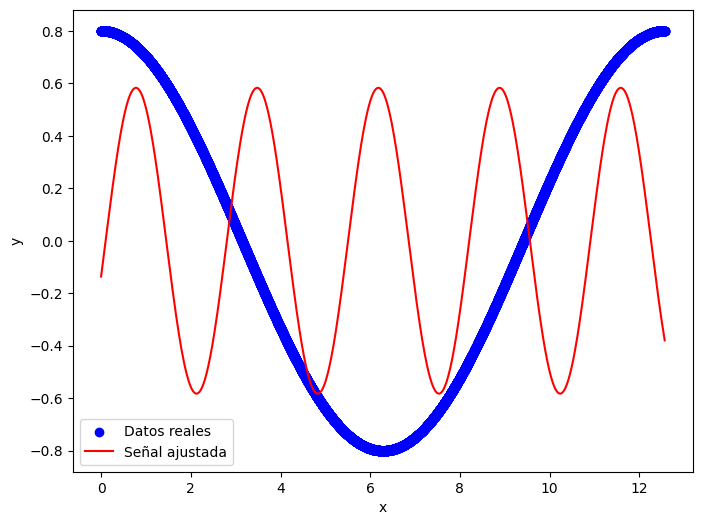

In [19]:
x_range = np.linspace(min(x), max(x), 1000) 
y_pred = [y_predict(a, b, c, d, x_val) for x_val in x_range]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Datos reales', marker='o', color='b')
plt.plot(x_range, y_pred, label='Señal ajustada', color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

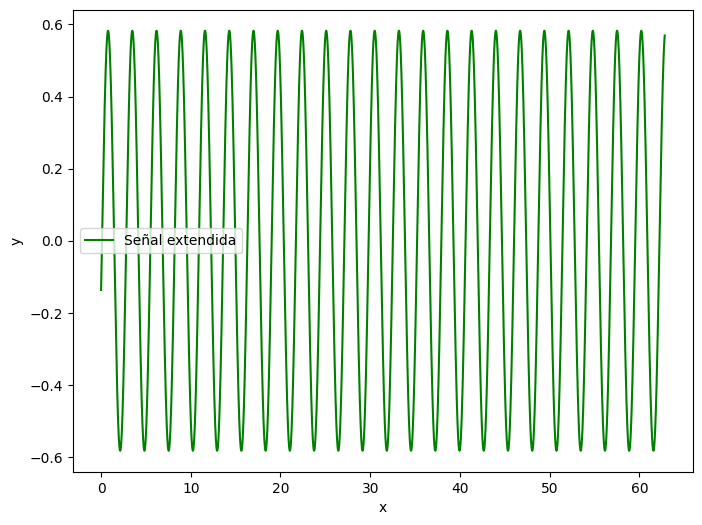

In [20]:
# Genera la señal extendida
x_min = min(x)
long_s = [y_predict(a, b, c, d, xi) for xi in np.arange(x_min, 20 * math.pi, 0.001).astype(np.float32)]

# Dibuja la señal extendida
plt.figure(figsize=(8, 6))
plt.plot(np.arange(x_min, 20 * math.pi, 0.001), long_s, label='Señal extendida', color='g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [99]:
#Cargar test
test_data = pd.read_csv('data/test/testpunto1.csv')
example_id = test_data["example_id"].values
test_x = test_data["x"].values

test_predictions = [y_predict(a, b, c, d, x_val) for x_val in test_x]


result_df = pd.DataFrame({'example_id': example_id, 'TARGET': test_predictions})

result_df.to_csv('test_predictions9.csv', index=False)